In [4]:
import numpy as np
import pandas as pd
import scipy
import imageio
import math
import phylo

from PIL import Image
from sklearn.linear_model import LogisticRegression

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")
plt.style.use("seaborn-whitegrid")

In [5]:
%load_ext blackcellmagic

In [6]:
REGULAR_POKEMON = phylo.vectorize_pokemon(phylo.REGULAR_POKEMON_PATH)
SHINY_POKEMON = phylo.vectorize_pokemon(phylo.SHINY_POKEMON_PATH)

Vectorizing pokemon from /Users/vineshkannan/Documents/GitHub/phylo/images/regular/
Vector iteration 0
Vector iteration 100
Vector iteration 200
Vector iteration 300
Vector iteration 400
Vector iteration 500
Vector iteration 600
Done vectorizing
Vectorizing pokemon from /Users/vineshkannan/Documents/GitHub/phylo/images/shiny/
Vector iteration 0
Vector iteration 100
Vector iteration 200
Vector iteration 300
Vector iteration 400
Vector iteration 500
Vector iteration 600
Done vectorizing


In [7]:
type(REGULAR_POKEMON), len(REGULAR_POKEMON)

(numpy.ndarray, 649)

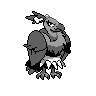

In [8]:
known_creatures = REGULAR_POKEMON[400:500]
phylo.unvectorize(known_creatures[0])

In [9]:
np.random.seed(42)
AF = len(known_creatures)
AT = len(known_creatures)
at_list = list(known_creatures)
af_list = [phylo.generate_random() for i in range(AF)]
train = af_list + at_list
X = np.array(train)
y = np.array([False for i in range(AF)] + [True for i in range(AT)])
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X, y)
print("Mean Accuracy = {0:.3f}".format(clf.score(X, y)))
print(clf.classes_)
clf.coef_

Mean Accuracy = 1.000
[False  True]


array([[-0.00118118, -0.0012504 , -0.00132023, ..., -0.00131051,
        -0.00116793, -0.00114431]])

In [10]:
cands = clf.predict_proba([phylo.generate_random() for i in range(100)])

In [11]:
cands[0:4]

array([[9.99991395e-01, 8.60503502e-06],
       [9.99991859e-01, 8.14093919e-06],
       [9.99992614e-01, 7.38589346e-06],
       [9.99992071e-01, 7.92873858e-06]])

In [12]:
w = clf.coef_[0]
max(w), np.argmax(w)

(0.0007851461609793746, 4658)

In [13]:
w[np.argmax(w)]

0.0007851461609793746

In [14]:
print("x = {}, y = {}".format(np.argmax(w) % phylo.M, math.floor(np.argmax(w) / phylo.M)))

x = 50, y = 48


In [18]:
shinee = clf.predict_proba(SHINY_POKEMON)
ddf = pd.DataFrame()
ddf["i"] = pd.Series(range(len(shinee)))
ddf["p"] = pd.Series([c[1] for c in shinee])
ddf.head(3)

,i,p
0,0,0.999999
1,1,0.999991
2,2,0.999998


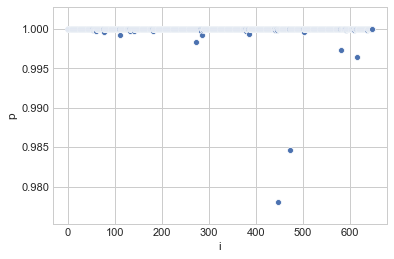

In [19]:
sns.scatterplot(x="i", y="p", data=ddf)

In [23]:
np.argmin(ddf["p"]), min(ddf["p"])

/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


(447, 0.9779809856030578)

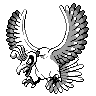

In [24]:
phylo.unvectorize(SHINY_POKEMON[447])

In [27]:
wdf = pd.DataFrame()
wdf["i"] = range(len(w))
wdf["w"] = w
wdf.head(3)

,i,w
0,0,-0.001181
1,1,-0.001250
2,2,-0.001320


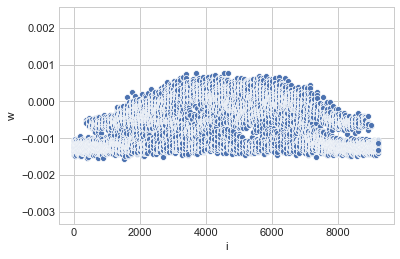

In [28]:
sns.scatterplot(x="i", y="w", data=wdf)

In [29]:
w

array([-0.00118118, -0.0012504 , -0.00132023, ..., -0.00131051,
       -0.00116793, -0.00114431])